In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

# 1. Books Dataset

In [4]:
books = pd.read_csv("C://Users//HP//Downloads//9. Association Rule//book.csv")
books

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


# Apriori Algorithm

# Association rules with 10% Support and 70% confidence

In [5]:
# Data preprocessing not required as it is already in transaction format
book = apriori(books, min_support=0.1, use_colnames=True)
book

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [6]:
rules = association_rules(book, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


### An leverage value of 0 indicates independence. Range will be [-1 1]
### A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [7]:
rules.sort_values('lift',ascending = False)[0:20]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
78,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
79,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
87,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
82,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
99,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
94,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [8]:
rules[rules.lift>1]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


<AxesSubplot:xlabel='support', ylabel='confidence'>

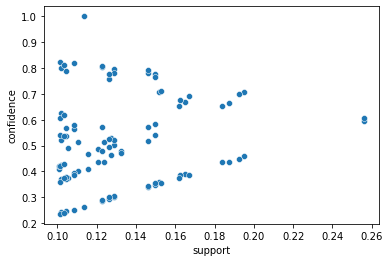

In [9]:
# visualization of obtained rule
sns.scatterplot(rules['support'],rules['confidence'])

array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>]], dtype=object)

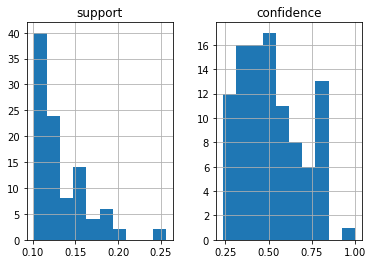

In [10]:
# visualization of obtained rule
rules[['support','confidence']].hist()

array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

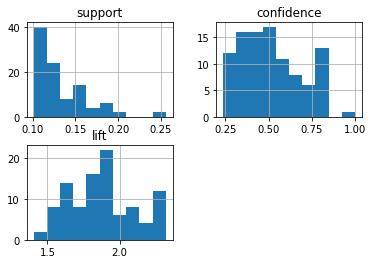

In [11]:
rules[['support','confidence','lift']].hist()

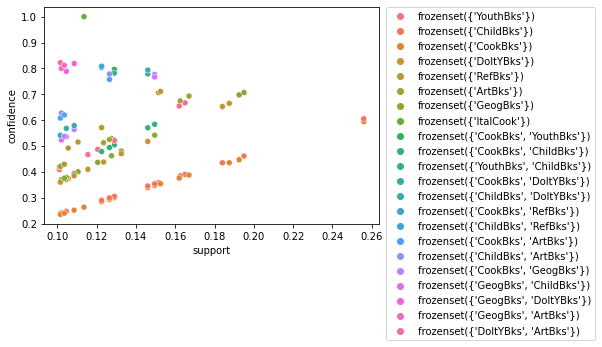

In [12]:
sns.scatterplot('support', 'confidence', data=rules, hue='antecedents')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

# Association rules with 5% Support and 80% confidence

In [14]:
# Data preprocessing not required as it is already in transaction format
book1 = apriori(books, min_support=0.05, use_colnames=True)
book1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(GeogBks, CookBks, YouthBks, DoItYBks)"
96,0.0560,"(GeogBks, CookBks, YouthBks, ArtBks)"
97,0.0650,"(CookBks, GeogBks, DoItYBks, ArtBks)"
98,0.0510,"(GeogBks, YouthBks, ChildBks, CookBks, DoItYBks)"


In [15]:
rules1 = association_rules(book1, metric="lift", min_threshold=0.8)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
657,(ArtBks),"(DoItYBks, CookBks, GeogBks, ChildBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939
658,(GeogBks),"(DoItYBks, CookBks, ChildBks, ArtBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733
659,(ChildBks),"(CookBks, GeogBks, DoItYBks, ArtBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379
660,(CookBks),"(DoItYBks, GeogBks, ChildBks, ArtBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789


### An leverage value of 0 indicates independence. Range will be [-1 1]
### A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [16]:
rules1.sort_values('lift',ascending = False)[0:20]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
182,"(CookBks, YouthBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
183,(ItalCook),"(CookBks, YouthBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
511,"(CookBks, GeogBks)","(ItalCook, ChildBks)",0.1925,0.0850,0.0525,0.272727,3.208556,0.036137,1.258125
510,"(ItalCook, ChildBks)","(CookBks, GeogBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923
512,"(CookBks, ChildBks)","(ItalCook, GeogBks)",0.2560,0.0640,0.0525,0.205078,3.204346,0.036116,1.177474
509,"(ItalCook, GeogBks)","(CookBks, ChildBks)",0.0640,0.2560,0.0525,0.820312,3.204346,0.036116,4.140522
640,"(CookBks, ChildBks, ArtBks)","(GeogBks, DoItYBks)",0.1265,0.1325,0.0535,0.422925,3.191886,0.036739,1.503271
653,"(GeogBks, DoItYBks)","(CookBks, ChildBks, ArtBks)",0.1325,0.1265,0.0535,0.403774,3.191886,0.036739,1.465047
514,(ItalCook),"(CookBks, GeogBks, ChildBks)",0.1135,0.1495,0.0525,0.462555,3.094014,0.035532,1.582488
507,"(CookBks, GeogBks, ChildBks)",(ItalCook),0.1495,0.1135,0.0525,0.351171,3.094014,0.035532,1.366307


In [17]:
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
657,(ArtBks),"(DoItYBks, CookBks, GeogBks, ChildBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939
658,(GeogBks),"(DoItYBks, CookBks, ChildBks, ArtBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733
659,(ChildBks),"(CookBks, GeogBks, DoItYBks, ArtBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379
660,(CookBks),"(DoItYBks, GeogBks, ChildBks, ArtBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

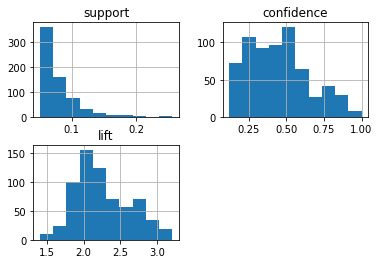

In [18]:
rules1[['support','confidence','lift']].hist()


<AxesSubplot:xlabel='support', ylabel='confidence'>

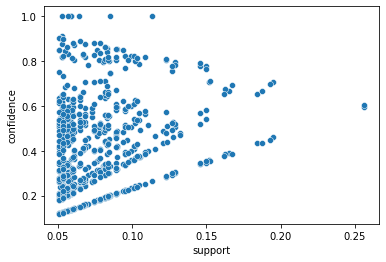

In [19]:
# visualization of obtained rule
sns.scatterplot(rules1['support'],rules1['confidence'])

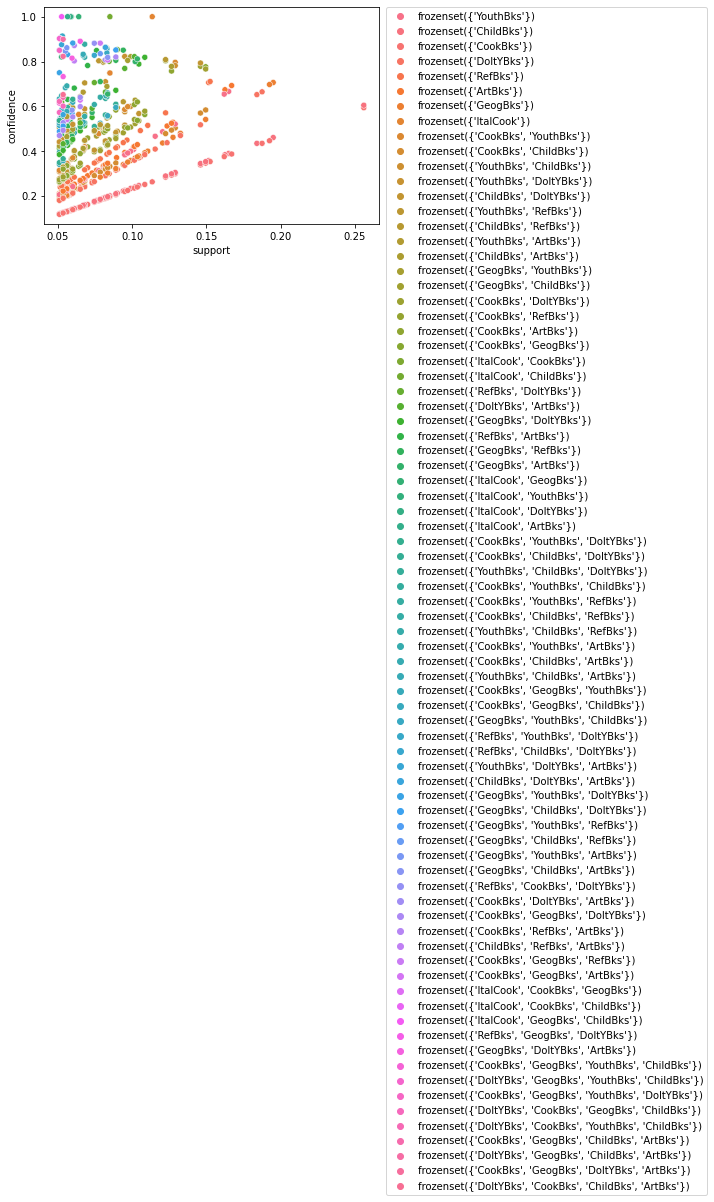

In [20]:
import seaborn as sns
sns.scatterplot('support', 'confidence', data=rules1, hue='antecedents')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()